# Axisymmetric Problems – Thick-Walled Pressure Vessel

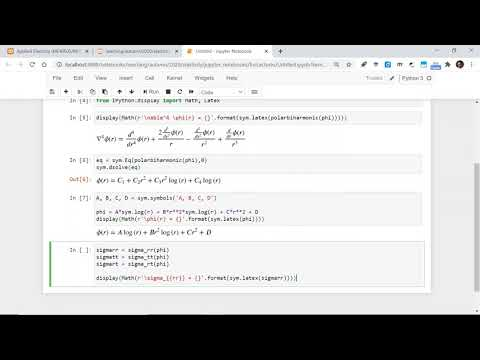

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Z2eaaBGDOy4')

We will follow the development of the ideas presented in Timoshenko and Goodier.

Earlier, we had considered various definitions leading to the biharmonic equation and stresses in polar coordinates. 

In this file, we are going to consider the set-up required for axisymmetric problems with particular focus on thick-walled pressure vessels. 

Before proceeding, however, note that in this file, we do not go into writing all those definitions again. Instead, we utilize those definitions packaged in a separate python file `polarUtilites.py`; this file is stored in the same folder as the Jupyter Notebook files. So, before proceeding, in order to make those definitions available for the current problem solution, we first need to import that file:

In [2]:
from polarUtilities import *

First, we will consider a $\theta$-independent Airy stress function, i.e. $\phi(r)$. 

In [3]:
phi = sym.Function('phi')(r)
display(phi)

phi(r)

Let's quickly check what the polar biharmonic of $\phi(r)$ looks like now that we dropped the $\theta$ dependence:

In [4]:
polarbiharmonic(phi)

Derivative(phi(r), (r, 4)) + 2*Derivative(phi(r), (r, 3))/r - Derivative(phi(r), (r, 2))/r**2 + Derivative(phi(r), r)/r**3

Let's display this in a better fashion:

In [5]:
from IPython.display import Math, Latex
display(Math(r'\nabla^4 \phi(r) = {}'.format(sym.latex(polarbiharmonic(phi)))))

<IPython.core.display.Math object>

Now, we would like to find the solution of the biharmonic equation, $\nabla^4 \phi = 0$:

In [6]:
eq = sym.Eq(polarbiharmonic(phi),0)
sym.dsolve(eq)

Eq(phi(r), C1 + C2*r**2 + C3*r**2*log(r) + C4*log(r))

That's it! That simple one line gives us the solution to the fourth order equation. Anyone who has tried to solve the fourth order equation by hand can attest to the fact that how much labour this step is saving us. I had emphasized this point heavily during my lecture so that the students appreciate the power of SymPy.  

Anyway, now that we have the solution, we will rewrite it in the notation used by Timoshenko and Goodier. 

In [7]:
A, B, C, D = sym.symbols('A, B, C, D')

phi = A*sym.log(r) + B*r**2*sym.log(r) + C*r**2 + D
display(Math(r'\phi(r) = {}'.format(sym.latex(phi))))

<IPython.core.display.Math object>

To determine the corresponding stress fields, we use our earlier definitions. We just have to call them:

In [8]:
sigmarr = sigma_rr(phi)
sigmatt = sigma_tt(phi)
sigmart = sigma_rt(phi)

display(Math(r'\sigma_{{rr}} = {}'.format(sym.latex(sigmarr))))
display(Math(r'\sigma_{{\theta\theta}} = {}'.format(sym.latex(sigmatt))))
display(Math(r'\sigma_{{r\theta}} = {}'.format(sym.latex(sigmart))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

If we are investigating the stress field for a geometry where there is no hole around the origin then we must set $A=0$ and $B=0$. Otherwise $\sigma_{rr}$ and $\sigma_{\theta\theta}$ will become infinite. In such a case, we have the following:

In [9]:
sigmarr_nohole = sigmarr.subs([(A,0),(B,0)])
sigmatt_nohole = sigmatt.subs([(A,0),(B,0)])

display(Math(r'\sigma_{{rr}}^{{\rm no-hole}} = {}'.format(sym.latex(sigmarr_nohole))))
display(Math(r'\sigma_{{\theta\theta}}^{{\rm no-hole}} = {}'.format(sym.latex(sigmatt_nohole))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The above formulae show that the radial and hoop stresses correspond to a state of uniform tension or uniform compression. 

Next, if there is a hole then we can have various other solutions. Suppose we take $A \neq 0$ and $B=0$. Then, we have the following:

In [10]:
sigmarr_hole = sigmarr.subs([(B,0)])
sigmatt_hole = sigmatt.subs([(B,0)])

display(Math(r'\sigma_{{rr}}^{{\rm hole}} = {}'.format(sym.latex(sigmarr_hole))))
display(Math(r'\sigma_{{\theta\theta}}^{{\rm hole}} = {}'.format(sym.latex(sigmatt_hole))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Students who have done an undergraduate course on Strength of Materials/Mechanics of Materials/Mechanics of Solids can identify that this form of the stress fields emerges in the problem of a thick-walled pressure vessel. 

So we will now focus on the thick-walled pressure vessel problem. 

## Solution to the thick-walled pressure vessel problem

Let the inner radius be $a$ and the outer radius be $b$. Then the boundary conditions are:

\begin{align}
\sigma_{rr} &= -p_{\rm in} \quad \text{at $r=a$} \\
\sigma_{rr} &= -p_{\rm out} \quad \text{at $r=b$}
\end{align}
where $p_{\rm in}$ and $p_{out}$ are the pressures inside and outside the pressure vessel, respectively. We will need to solve for the two unknown constants $A$ and $C$ using these two boundary conditions. We can again implement this solution in SymPy. 

In [11]:
pin, pout = sym.symbols(r'p_\mathrm{in}, p_\mathrm{out}')
display(pin, pout)

p_\mathrm{in}

p_\mathrm{out}

In [12]:
a, b = sym.symbols('a, b', positive=True)

We set up the two equations from the boundary conditions as follows:

In [13]:
lhs1 = sigmarr_hole.subs([(r,a)])
rhs1 = -pin
eq1 = sym.Eq(lhs1,rhs1)
display(eq1)

lhs2 = sigmarr_hole.subs([(r,b)])
rhs2 = -pout
eq2 = sym.Eq(lhs2,rhs2)
display(eq2)

Eq(A/a**2 + 2*C, -p_\mathrm{in})

Eq(A/b**2 + 2*C, -p_\mathrm{out})

Next, we solve the above two equations to obtain the values of $A$ and $C$ as follows:

In [14]:
soln, = sym.linsolve([eq1,eq2],[A,C])

Asoln = soln[0]
Csoln = soln[1]

display(Math(r'A = {}'.format(sym.latex(Asoln))))
display(Math(r'C = {}'.format(sym.latex(Csoln))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

To obtain the solutions to the stress field, we just have to make the appropriate substitutions:

In [15]:
sigmarr_hole_soln = sigmarr_hole.subs([(A,Asoln),(C,Csoln)])
sigmatt_hole_soln = sigmarr_hole.subs([(A,Asoln),(C,Csoln)])

display(Math(r'\sigma_{{rr}}^{{\rm hole-soln}} = {}'.format(sym.latex(sigmarr_hole_soln))))
display(Math(r'\sigma_{{\theta\theta}}^{{\rm hole-soln}} = {}'.format(sym.latex(sigmatt_hole_soln))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

These solutions match with those given in Timoshenko and Goodier!